<a href="https://colab.research.google.com/github/mashhisyam/PVCK_Genap_2022/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [6]:
def convolution2d(image, kernel, stride, padding):
  image : np.pad(image, padding, mode='constant', constant_value = 0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride+1
  output_width = (padded_width - kernel_width) // stride+1

  newImg = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      newImg[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return newImg

In [7]:
mandrill = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
mandrill_resize = cv.resize(mandrill, (0,0), fx=0.5, fy=0.5)
mandrill_gray = cv.cvtColor(mandrill_resize, cv.COLOR_BGR2GRAY)

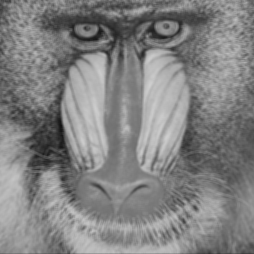

In [9]:
# Average Filter
average_filter = np.array([[1,1,1],
                          [1,1,1],
                          [1,1,1]])/9
cv2_imshow(convolution2d(mandrill_gray, average_filter, 1,2))                          

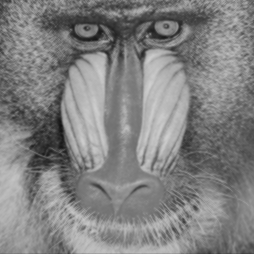

In [10]:
# Low Pass Filter
low_pass = np.array([[1,1,1],
                     [1,4,1],
                     [1,1,1]])/12
cv2_imshow(convolution2d(mandrill_gray, low_pass, 1,2))                  

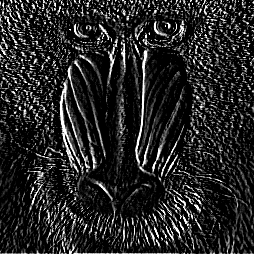

In [11]:
# High Pass Filter
high_pass = np.array([[-1,0,1],
                      [-1,0,3],
                      [-3,0,1]])
cv2_imshow(convolution2d(mandrill_gray, high_pass, 1,2))

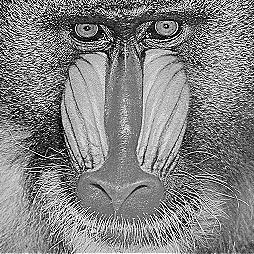

In [ ]:
# sharpen
sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
cv2_imshow(convolution2d(mandrill_gray, sharpen, 1,2))

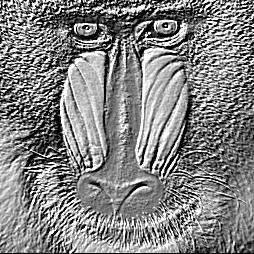

In [ ]:
# emboss
emboss = np.array([[-2, -1, 0],
                        [-1, 1, 1],
                        [0, 1, 2]])
cv2_imshow(convolution2d(mandrill_gray, emboss, 1,2))

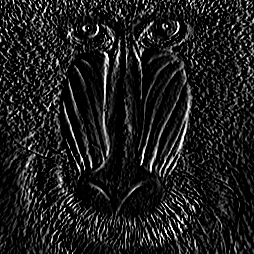

In [ ]:
# left sobel edge detection
sobel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])
cv2_imshow(convolution2d(mandrill_gray, sobel, 1,2))

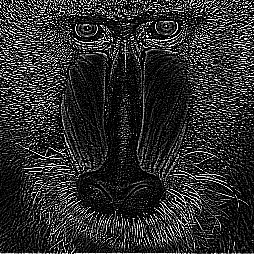

In [ ]:
# canny edge detection
canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])
cv2_imshow(convolution2d(mandrill_gray, canny, 1,2))

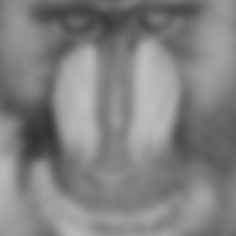

In [ ]:
# image 21x21 with gaussian blur
size = 21
sigma = math.sqrt(size)
gaussian_kernel = cv.getGaussianKernel(size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(mandrill_gray, gauss_kernel, 1,2))